In [89]:
# !pip install pymysql

In [90]:
# !pip install mysql
# !pip install mysql-connector-python-rf

In [91]:
import mysql.connector as sql
import pandas as pd

mysql_host = 'cpanel.insaid.co'
mysql_db = 'Capstone1'
mysql_user = 'student'
mysql_password = 'student'

db_connection = sql.connect(host=mysql_host, database=mysql_db, user=mysql_user, password=mysql_password)
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM gender_age_train')

table_rows = db_cursor.fetchall()

df_gender_age_train = pd.DataFrame(table_rows, columns=['device_id','gender','age','group'])
df_gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [92]:
db_cursor.execute('SELECT * FROM phone_brand_device_model ')
table_rows = db_cursor.fetchall()

df_phone_brand_device_model = pd.DataFrame(table_rows, columns=['device_id', 'phone_brand','device_model'])
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [93]:
df_events_data = pd.read_csv('events_data.csv')
df_events_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


In [94]:
print("df_gender_age_train : ",df_gender_age_train.shape)
print("df_phone_brand_device_model : ", df_phone_brand_device_model.shape)
print("df_events_data : ",df_events_data.shape)

df_gender_age_train :  (74645, 4)
df_phone_brand_device_model :  (87726, 3)
df_events_data :  (3252950, 7)


In [95]:
print("*"*50)
df_gender_age_train.info()
print("*"*50)
df_phone_brand_device_model.info()
print("*"*50)
df_events_data.info()
print("*"*50)

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(4), obje

### Save the data frame to csv file (local copy)

In [96]:
df_gender_age_train.to_csv('gender_age_train.csv')
df_phone_brand_device_model.to_csv('phone_brand_device_model.csv')

In [97]:
df_gender_age_train.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [98]:
df_phone_brand_device_model.groupby(['phone_brand','device_model'])['device_model'].count()

phone_brand  device_model   
E人E本         T9                    1
E派           T7                    5
             U5482                 4
             大Q Note               4
HTC          603e                  1
             606w                 15
             608t                  8
             7060                  8
             802d                 12
             802w                 54
             Butterfly            41
             Butterfly s           6
             D516w                 5
             Desire 310            4
             Desire 5088           5
             Desire 609d           3
             Desire 610t          16
             Desire 616            4
             Desire 626           27
             Desire 7088          11
             Desire 816          234
             Desire 816x           1
             Desire 820           93
             Desire 820 Mini      14
             Desire 826           38
             Desire D316d          5
         

In [99]:
gatrain = df_gender_age_train.copy()
phone = df_phone_brand_device_model.copy()
events = df_events_data.copy()

In [100]:
gatrain.device_id = gatrain.device_id.astype('object')
gatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null object
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [101]:
phone.device_id = phone.device_id.astype('object')
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null object
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: object(3)
memory usage: 2.0+ MB


In [102]:
events.device_id = events.device_id.astype('object')
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    object
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(3), object(4)
memory usage: 173.7+ MB


In [103]:
print(gatrain.shape)
print(phone.shape)
print(events.shape)

(74645, 4)
(87726, 3)
(3252950, 7)


### check for duplicated entries

In [104]:
gatrain.device_id.nunique() # no duplicated device id's

74645

In [105]:
gatrain.isnull().sum() # no null entries

device_id    0
gender       0
age          0
group        0
dtype: int64

In [106]:
(gatrain==0).sum() # no zero value entries

device_id    0
gender       0
age          0
group        0
dtype: int64

In [107]:
for col in gatrain.columns:
    print("{} : {} -> {}".format(col, gatrain[col].nunique(), gatrain[col].unique()))
    print()

device_id : 74645 -> [-8076087639492063270 -2897161552818060146 -8260683887967679142 ...
 180946546684162312 1390702386071991851 89181010588227347]

gender : 2 -> ['M' 'F']

age : 85 -> [35 30 24 36 38 33 31 37 28 32 48 75 39 25 27 29 34 22 26 47 44 21 42 64
 46 23 20 41 43 51 49 53 59 45 50 70 67 19 52 40 63 60 61 78 56 65 58 17
 16 18 71 54 76 62 73 66 55 57 83 84 81 80 79 77 74 13 68 89 87 69 88 72
 82 90 96 15  1 12 14 10 85 86 11  6 94]

group : 12 -> ['M32-38' 'M29-31' 'F24-26' 'F33-42' 'F27-28' 'M39+' 'M23-26' 'M27-28'
 'M22-' 'F43+' 'F23-' 'F29-32']



In [108]:
gatrain.describe() # age value 1 ??? lets see the unique age values in ascending order

,age
count,74645.000000
mean,31.410342
std,9.868735
min,1.000000
25%,25.000000
50%,29.000000
75%,36.000000
max,96.000000


In [109]:
age_val = gatrain.age.unique()
for age in np.sort(age_val):
    print(age, end=' ')

<IPython.core.display.Javascript object>

1 6 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 94 96 

<IPython.core.display.Javascript object>

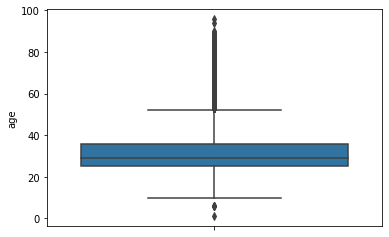

In [110]:
sns.boxplot(data=gatrain, y='age')

In [144]:
gatrain[gatrain.age < 10] # all male kids

,device_id,gender,age,group
10385,3553057874282315257,M,1,M22-
60779,-8513863533705424532,M,6,M22-
60831,-5323874218045578676,M,6,M22-
60832,3646841514566479686,M,6,M22-
60833,5222152119137955379,M,6,M22-


In [112]:
print(gatrain.shape)
print(phone.shape)
print(events.shape)

(74645, 4)
(87726, 3)
(3252950, 7)


In [113]:
print("Total : {}".format(phone.device_id.count()))
print("Unique : {}".format(phone.device_id.nunique()))
print("Duplicate : {}".format(phone.device_id.count() - phone.device_id.nunique()))

Total : 87726
Unique : 87726
Duplicate : 0


In [114]:
phone.isnull().sum() # no null values

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [115]:
(phone==0).sum() # no zero value entries

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [116]:
phone.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [148]:
events = df_events_data.copy()
pd.options.display.float_format = '{:.0f}'.format
events.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1,29182687948017176,2016-05-01 00:55:25,77,29,Delhi,Delhi
1,7104,29182687948017176,2016-05-02 09:37:02,77,29,Delhi,Delhi


In [151]:
events.isnull().sum() # null values in device id, state, lat and long features

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [154]:
events.device_id = events.device_id.astype(object)
events.head(1)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1,29182687948017176,2016-05-01 00:55:25,77,29,Delhi,Delhi


In [155]:
events.nunique()

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60185
city             933
state             32
dtype: int64

In [157]:
print("Min : {}\nMax : {}".format(events.timestamp.min(), events.timestamp.max()))

Min : 2016-04-30 23:52:24
Max : 2016-05-08 00:00:08


In [158]:
print("Min -> Lat : {} Long : {}".format(events.latitude.min(), events.longitude.min()))
print("Max -> Lat : {} Long : {}".format(events.latitude.max(), events.longitude.max()))

Min -> Lat : 8.190109999999999 Long : 12.567
Max -> Lat : 41.8719 Long : 95.459457


In [159]:
c1 = events.latitude.isnull()
c2 = events.state.isnull()
events[c1 & c2]

,event_id,device_id,timestamp,longitude,latitude,city,state


In [165]:
c1 = events.longitude.isnull()
c2 = events.state.isnull()
events[c1 & c2]

,event_id,device_id,timestamp,longitude,latitude,city,state


In [170]:
c1 = events.longitude.isnull()
c2 = events.latitude.isnull()
events[c1 & c2].device_id.count()

423

In [171]:
events[events.state.isnull()].device_id.count()

377

In [174]:
len(events)

3252950

In [178]:
# events = events.set_index('event_id')
events.drop_duplicates(inplace=True)
len(events)

3217975

In [179]:
events.device_id.nunique()

60865

In [ ]:
# gender_age_train :

# - has ~75K unique records
# - no duplicated device id's
# - no null entries
# - no zero value entries
# - "Age" : has 5 entries less than 10, is this valid ?? (need to check)
# - AgeGroup : divided into 12 groups

# phone_brand_device_model :

# - has ~88K unique records
# - no null values
# - no zero value entries
# - brand names in chinese, to be converted to eng.


# events_data :

# - has ~3218K unique records
# - null values for device id (453 records)
# - null values for latitude/longitude (423 records)
# - null values for state (377 records)
# - state and lat/long are not null at the same time.
# - device id is using exponential representation.
# - timestamp, need to handled the datetime month/day/hour wise.

In [62]:
print(gatrain.shape)
print(phone.shape)

# this means that when merged, there will be entires with null values for device id 
# as count of device id's in gatrain is less than that in phone

(74645, 4)
(87726, 3)


In [ ]:
phone = phone.set_index('device_id')
phone.head()

In [ ]:
gatrain['trainrow'] = np.arange(gatrain.shape[0])
gatrain.head(2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
brandencoder = LabelEncoder().fit(phone.phone_brand)
phone['brand'] = brandencoder.transform(phone['phone_brand'])
phone.head()

In [ ]:
#phone['brand'] = phone['brand'].astype(int)
#gatrain['brand'] = pd.to_numeric(phone['brand'], downcast='signed')
gatrain['brand'] = phone['brand']
gatrain[gatrain['brand'].isnull()]

In [ ]:
gatrain['brand'] = gatrain['brand'].fillna(0)
gatrain[gatrain['brand'].isnull()]
gatrain['brand'] = gatrain['brand'].astype(int)

In [ ]:
from scipy.sparse import csr_matrix, hstack
Xtr_brand = csr_matrix((np.ones(gatrain.shape[0]), (gatrain.trainrow, gatrain.brand)))
print('Brand features: train shape {}'.format(Xtr_brand.shape))

In [ ]:
m = phone.phone_brand.str.cat(phone.device_model)
modelencoder = LabelEncoder().fit(m)
phone['model'] = modelencoder.transform(m)
gatrain['model'] = phone['model']
gatrain.head()

In [ ]:
gatrain.model = gatrain.model.fillna(0)
gatrain.model = gatrain.model.astype(int)

In [ ]:
Xtr_model = csr_matrix((np.ones(gatrain.shape[0]), 
                       (gatrain.trainrow, gatrain.model)))
print('Model features: train shape {}'.format(Xtr_model.shape))

In [ ]:
Xtrain = hstack((Xtr_brand, Xtr_model), format='csr')
Xtrain.shape

In [ ]:
Xtrain

In [ ]:
train = df_gender_age_train.copy()
pbd = df_phone_brand_device_model.copy()
events_small = df_events_data.copy()

In [ ]:
#events_small = events[['device_id', 'counts', 'installed', 'active']].drop_duplicates('device_id', keep='first')
events_small = events_small.drop_duplicates('device_id', keep='first')
events_small.head(2)

In [ ]:
pbd.drop_duplicates('device_id', keep='first', inplace=True)
pbd.head()

In [ ]:
def map_column(table, f):
    labels = sorted(table[f].unique())
    mappings = dict()
    for i in range(len(labels)):
        mappings[labels[i]] = i
    table = table.replace({f: mappings})
    return table

In [ ]:
pbd = map_column(pbd, 'phone_brand')
pbd = map_column(pbd, 'device_model')
pbd.head()

In [ ]:
train = map_column(train, 'group')
train.head()

In [ ]:
train = train.drop(['age'], axis=1)
train = train.drop(['gender'], axis=1)
train.head()

In [ ]:
train = pd.merge(train, pbd, how='left', on='device_id', left_index=True)
train.head()

In [ ]:
train.isnull().sum()

In [ ]:
train = pd.merge(train, events_small, how='left', on='device_id', left_index=True)
train.head()

In [ ]:
train.isnull().sum()

In [ ]:
train.fillna(-1, inplace=True)
train.head()

In [ ]:
train.isnull().sum()

In [ ]:
features = list(train.columns.values)
features.remove('device_id')
features

In [ ]:
sorted(features)

In [ ]:
https://www.kaggle.com/beyondbeneath/geolocation-visualisations
https://www.kaggle.com/xingobar/data-visualization-1
https://www.kaggle.com/beyondbeneath/geolocation-heatmap
https://www.kaggle.com/laurae2/a-linear-model-on-apps-and-labels
https://www.kaggle.com/samarthagarwal23/bag-of-apps-keras-11-08-16
https://www.kaggle.com/xiaoml/low-ram-bag-of-apps-python
https://www.kaggle.com/tilii7/xgboost-simple-starter-more-features
https://www.kaggle.com/iuga77/translate-brand-names-snippet